In [39]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import random
import math
from PIL import Image
from pathlib import Path

In [40]:
def dataframe(directory):
    paths=pd.Series(list(directory.glob(r"*.png")),name="ImagPath").astype(str)
    return paths

In [41]:
Paths=Path("D:\Sat Images")
Images=dataframe(Paths)

In [42]:
Images

0     D:\Sat Images\1984.png
1     D:\Sat Images\1985.png
2     D:\Sat Images\1986.png
3     D:\Sat Images\1987.png
4     D:\Sat Images\1988.png
5     D:\Sat Images\1989.png
6     D:\Sat Images\1990.png
7     D:\Sat Images\1991.png
8     D:\Sat Images\1992.png
9     D:\Sat Images\1993.png
10    D:\Sat Images\1994.png
11    D:\Sat Images\1995.png
12    D:\Sat Images\1996.png
13    D:\Sat Images\1997.png
14    D:\Sat Images\1998.png
15    D:\Sat Images\1999.png
16    D:\Sat Images\2000.png
17    D:\Sat Images\2001.png
18    D:\Sat Images\2002.png
19    D:\Sat Images\2003.png
20    D:\Sat Images\2004.png
21    D:\Sat Images\2005.png
22    D:\Sat Images\2006.png
23    D:\Sat Images\2007.png
24    D:\Sat Images\2008.png
25    D:\Sat Images\2009.png
26    D:\Sat Images\2010.png
27    D:\Sat Images\2011.png
28    D:\Sat Images\2012.png
29    D:\Sat Images\2013.png
30    D:\Sat Images\2014.png
31    D:\Sat Images\2015.png
32    D:\Sat Images\2016.png
33    D:\Sat Images\2017.png
34    D:\Sat I

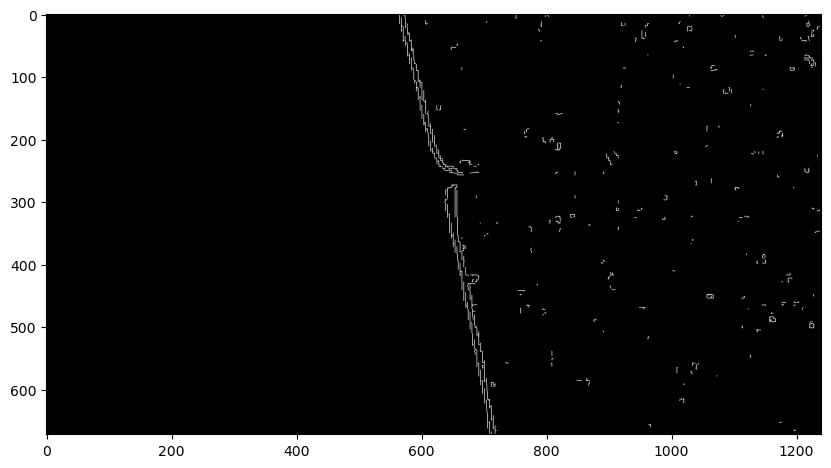

In [87]:

image=cv2.imread(Images[0],cv2.IMREAD_GRAYSCALE)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
edge = cv2.Canny(image, threshold1=250, threshold2=200)

plt.figure(figsize=(10,8))
plt.imshow(edge,cmap="gray")
plt.show()

In [89]:
edge_points = np.argwhere(edge== 255)

In [45]:
print(edge_points)

[[  0 565]
 [  0 571]
 [  0 574]
 ...
 [671 709]
 [671 712]
 [671 718]]


In [46]:
Data_points=np.array(edge_points)

In [47]:
Data_points

array([[  0, 565],
       [  0, 571],
       [  0, 574],
       ...,
       [671, 709],
       [671, 712],
       [671, 718]], dtype=int64)

In [48]:
year=1984
df=pd.DataFrame(Data_points)
df.columns=["Axis",year]

In [49]:
df

,Axis,1984
0,0,565
1,0,571
2,0,574
3,0,1214
4,0,1217
...,...,...
3829,670,712
3830,670,718
3831,671,709
3832,671,712


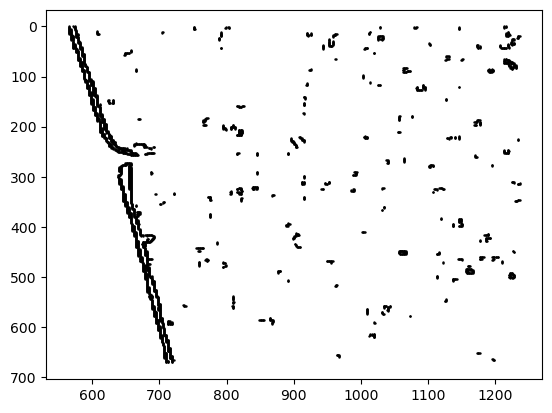

In [50]:
plt.figure()
plt.scatter(df[year],df["Axis"],s=0.5,color="black")
plt.gca().invert_yaxis()
plt.show()

In [51]:
df= df.drop_duplicates(subset=["Axis"]).reset_index(drop=True)

df


,Axis,1984
0,0,565
1,1,565
2,2,565
3,3,565
4,4,565
...,...,...
666,667,709
667,668,709
668,669,709
669,670,709


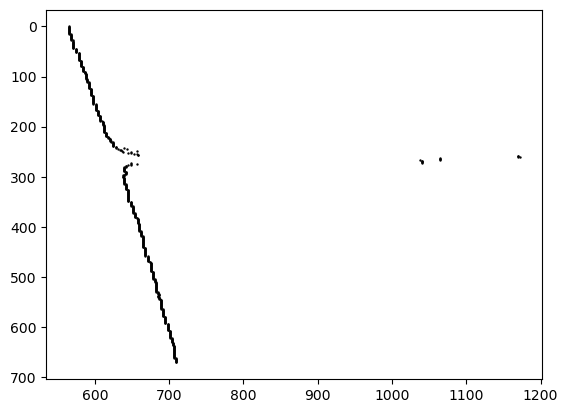

In [52]:

plt.figure()
plt.scatter(df[year],df["Axis"],s=0.5,color="black")
plt.gca().invert_yaxis()
plt.show()

In [53]:
df.to_csv("D:\Data Frame.csv",index=False)

In [54]:
for i in range(1,len(Images)):
    image=cv2.imread(Images[i],cv2.IMREAD_GRAYSCALE)
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    edge = cv2.Canny(image, threshold1=250, threshold2=200)
    edge_points = np.argwhere(edge== 255)
    Data_points=np.array(edge_points)
    ndf=pd.DataFrame(Data_points)
    year=1984+i
    ndf.columns=["Axis",year]
    ndf= ndf.drop_duplicates(subset=["Axis"]).reset_index(drop=True)
    df = pd.concat([df, ndf[year]], axis=1)
    df.to_csv("D:\Data Frame.csv",index=False)

In [55]:
Points=pd.read_csv("D:\Data Frame.csv")

Points

,Axis,1984,1985,1986,1987,1988,1989,1990,1991,1992,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0.0,565.0,565.0,565.0,565.0,565.0,565,565.0,565.0,565,...,565,565,565,572,566,566,565,567,566,566
1,1.0,565.0,565.0,565.0,565.0,565.0,565,565.0,564.0,565,...,565,565,565,572,566,566,566,566,566,566
2,2.0,565.0,565.0,565.0,565.0,565.0,565,565.0,564.0,565,...,565,565,566,573,566,566,566,566,566,567
3,3.0,565.0,565.0,565.0,565.0,565.0,565,565.0,565.0,565,...,565,565,566,573,566,566,566,566,566,567
4,4.0,565.0,565.0,565.0,565.0,565.0,565,565.0,565.0,565,...,565,565,567,564,567,566,566,566,566,566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,668.0,709.0,709.0,709.0,709.0,709.0,709,709.0,NaN,709,...,709,709,710,710,713,711,713,713,713,710
668,669.0,709.0,709.0,709.0,709.0,709.0,709,709.0,NaN,709,...,709,709,710,711,713,711,713,713,713,710
669,670.0,709.0,709.0,709.0,709.0,709.0,709,NaN,NaN,709,...,709,712,712,713,713,711,713,713,713,714
670,671.0,709.0,709.0,709.0,709.0,709.0,709,NaN,NaN,709,...,709,712,714,713,713,711,713,714,713,714


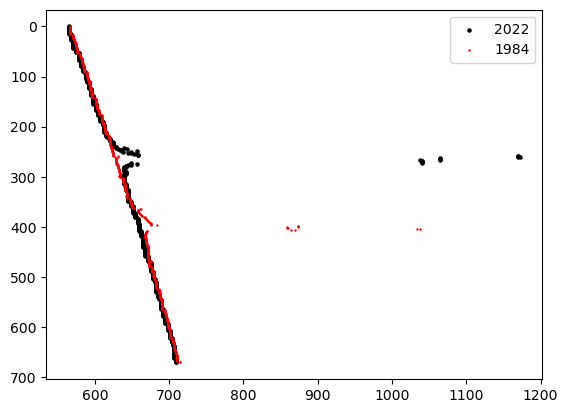

In [56]:
plt.figure()
plt.scatter(Points["1984"],Points["Axis"],s=5,color="black",label="2022")
plt.scatter(Points["2022"],Points["Axis"],s=0.5,color="red",label='1984')
plt.gca().invert_yaxis()
plt.legend()
plt.show()

In [57]:
#Points

In [58]:
for i in range(1984,2023):
    c=Points[str(i)]
    c.fillna(method="ffill",inplace=True)
    Points[str(i)]=c

In [59]:
Points

,Axis,1984,1985,1986,1987,1988,1989,1990,1991,1992,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0.0,565.0,565.0,565.0,565.0,565.0,565,565.0,565.0,565,...,565,565,565,572,566,566,565,567,566,566
1,1.0,565.0,565.0,565.0,565.0,565.0,565,565.0,564.0,565,...,565,565,565,572,566,566,566,566,566,566
2,2.0,565.0,565.0,565.0,565.0,565.0,565,565.0,564.0,565,...,565,565,566,573,566,566,566,566,566,567
3,3.0,565.0,565.0,565.0,565.0,565.0,565,565.0,565.0,565,...,565,565,566,573,566,566,566,566,566,567
4,4.0,565.0,565.0,565.0,565.0,565.0,565,565.0,565.0,565,...,565,565,567,564,567,566,566,566,566,566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,668.0,709.0,709.0,709.0,709.0,709.0,709,709.0,709.0,709,...,709,709,710,710,713,711,713,713,713,710
668,669.0,709.0,709.0,709.0,709.0,709.0,709,709.0,709.0,709,...,709,709,710,711,713,711,713,713,713,710
669,670.0,709.0,709.0,709.0,709.0,709.0,709,709.0,709.0,709,...,709,712,712,713,713,711,713,713,713,714
670,671.0,709.0,709.0,709.0,709.0,709.0,709,709.0,709.0,709,...,709,712,714,713,713,711,713,714,713,714


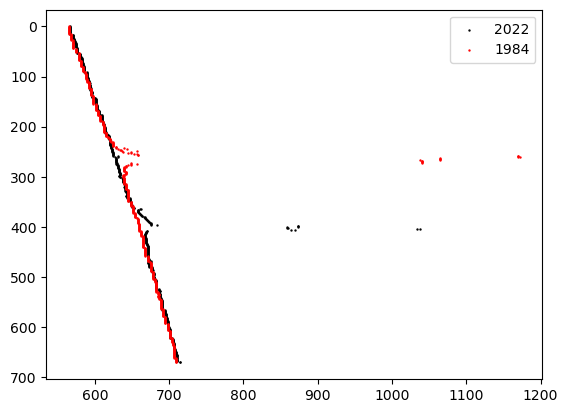

In [60]:
plt.figure()
plt.scatter(Points["2022"],Points["Axis"],s=0.5,color="black",label="2022")
plt.scatter(Points["1984"],Points["Axis"],s=0.5,color="red",label='1984')
plt.gca().invert_yaxis()
plt.legend()
plt.show()

In [61]:
Cost=Points["1984"].mean()

In [62]:
from sklearn.svm import SVR
svr_rbf=SVR(kernel="rbf",C=Cost,gamma=0.1)

In [63]:
x_300=np.array(Points.iloc[450][1:]).reshape(-1,1)
years=np.array([i for i in range(1984,2023)]).reshape(-1,1)

In [64]:
svr_rbf.fit(years,x_300)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=651.9136904761905, gamma=0.1)

In [65]:
y_pred=svr_rbf.predict(years)

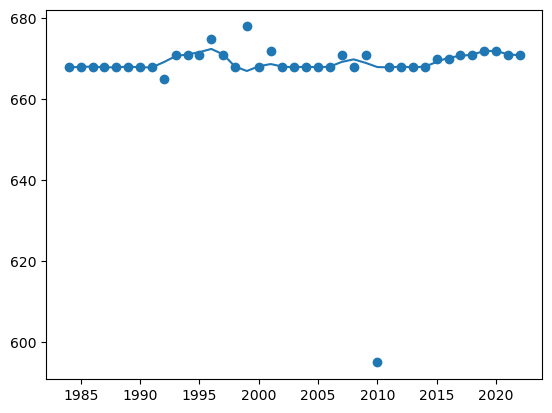

In [66]:
plt.figure()
plt.scatter(years,x_300)
plt.plot(years,y_pred)
plt.show()

In [67]:
y=np.array([2050]).reshape(-1,1)
y_p=svr_rbf.predict(y)
y_p

array([669.54377579])

In [68]:
rbf_models = []
for i in range(len(Points)):
    x = np.array(Points.iloc[i][1:]).reshape(-1, 1)
    years = np.array([i for i in range(1984, 2023)]).reshape(-1, 1)
    rbf_model = SVR(kernel='rbf',C=Cost,gamma=0.1)
    rbf_model.fit(years, x)
    rbf_models.append(rbf_model)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [69]:
def Prediction(year):
    pred_points = []
    year = np.array([year]).reshape(-1, 1)
    for rbf_model in rbf_models:
        prediction = rbf_model.predict(year)
        pred_points.append(prediction)
    return pred_points

In [70]:
Prediction(2010)

[array([562.63963442]),
 array([562.61665221]),
 array([562.57109962]),
 array([562.36240993]),
 array([563.89325909]),
 array([563.53009424]),
 array([564.0551804]),
 array([564.63019712]),
 array([564.56793277]),
 array([563.33063564]),
 array([564.09979491]),
 array([564.09976263]),
 array([564.10019612]),
 array([564.0995987]),
 array([564.09960664]),
 array([564.1000414]),
 array([564.09946803]),
 array([565.10001896]),
 array([565.10027841]),
 array([565.10022447]),
 array([564.99187829]),
 array([564.8996825]),
 array([565.00327424]),
 array([565.61800174]),
 array([565.83779479]),
 array([565.64553924]),
 array([568.50717948]),
 array([568.10013837]),
 array([568.09938762]),
 array([568.10028278]),
 array([567.89980731]),
 array([568.21403893]),
 array([567.90043471]),
 array([567.90040648]),
 array([567.9003594]),
 array([568.09971162]),
 array([571.23145809]),
 array([570.81217509]),
 array([570.56870401]),
 array([570.50674711]),
 array([570.3539689]),
 array([570.72710713])

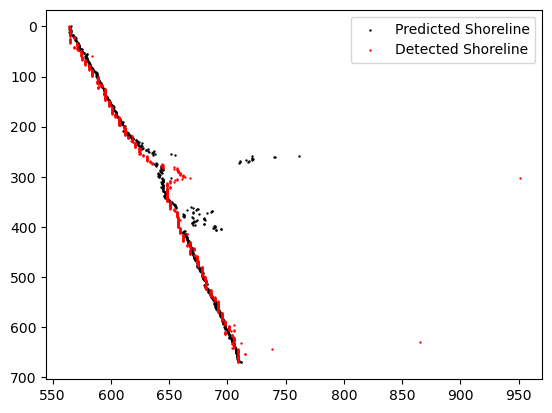

In [78]:
plt.figure()
plt.scatter(Prediction(2040),Points["Axis"],s=0.5,color="black",label="Predicted Shoreline")
plt.scatter(Points["2000"],Points["Axis"],s=0.5,color="red",label='Detected Shoreline')
plt.gca().invert_yaxis()
plt.legend()
plt.show()

In [72]:
def Plot(year1,year2=1984):
    image_path=f"D:\Sat Images\{year2}.png"
    image = cv2.imread(image_path)
    plt.figure()
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.scatter(Prediction(year1),Points["Axis"],s=0.5,color="black",label="Predicted Shoreline")
    plt.scatter(Points[str(year2)],Points["Axis"],s=0.05,color="red",label='Detected Shoreline')
    plt.legend()
    plt.show()

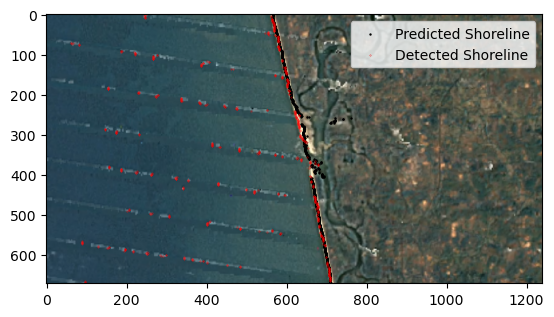

In [81]:
Plot(2040,2010)

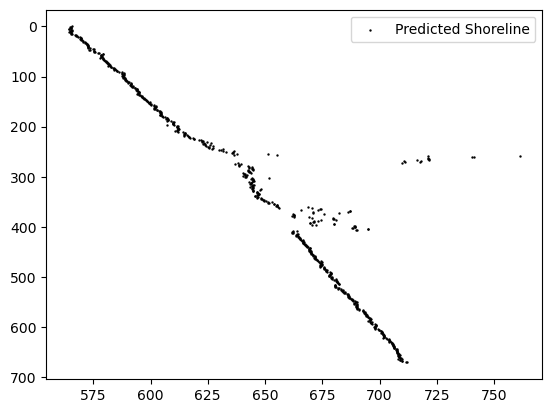

In [79]:
plt.figure()
plt.scatter(Prediction(200),Points["Axis"],s=0.5,color="black",label="Predicted Shoreline")
#plt.scatter(Points["2000"],Points["Axis"],s=0.5,color="red",label='Detected Shoreline')
plt.gca().invert_yaxis()
plt.legend()
plt.show()

In [74]:
Points

,Axis,1984,1985,1986,1987,1988,1989,1990,1991,1992,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0.0,565.0,565.0,565.0,565.0,565.0,565,565.0,565.0,565,...,565,565,565,572,566,566,565,567,566,566
1,1.0,565.0,565.0,565.0,565.0,565.0,565,565.0,564.0,565,...,565,565,565,572,566,566,566,566,566,566
2,2.0,565.0,565.0,565.0,565.0,565.0,565,565.0,564.0,565,...,565,565,566,573,566,566,566,566,566,567
3,3.0,565.0,565.0,565.0,565.0,565.0,565,565.0,565.0,565,...,565,565,566,573,566,566,566,566,566,567
4,4.0,565.0,565.0,565.0,565.0,565.0,565,565.0,565.0,565,...,565,565,567,564,567,566,566,566,566,566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,668.0,709.0,709.0,709.0,709.0,709.0,709,709.0,709.0,709,...,709,709,710,710,713,711,713,713,713,710
668,669.0,709.0,709.0,709.0,709.0,709.0,709,709.0,709.0,709,...,709,709,710,711,713,711,713,713,713,710
669,670.0,709.0,709.0,709.0,709.0,709.0,709,709.0,709.0,709,...,709,712,712,713,713,711,713,713,713,714
670,671.0,709.0,709.0,709.0,709.0,709.0,709,709.0,709.0,709,...,709,712,714,713,713,711,713,714,713,714


In [75]:
Points.to_csv(Points, sep=',', index=False, encoding='utf-8')

TypeError: argument of type 'method' is not iterable